# Kaggle Challenge: Titanic - Machine Learning from Disaster
## Challenge Link: https://www.kaggle.com/competitions/titanic 
## Best Score I got: 0.76555

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trainData = pd.read_csv("/home/emanueloliveira/Kaggle Challenges/titanic/train.csv")

In [3]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
for i in trainData['Ticket']:
    print(i)

A/5 21171
PC 17599
STON/O2. 3101282
113803
373450
330877
17463
349909
347742
237736
PP 9549
113783
A/5. 2151
347082
350406
248706
382652
244373
345763
2649
239865
248698
330923
113788
349909
347077
2631
19950
330959
349216
PC 17601
PC 17569
335677
C.A. 24579
PC 17604
113789
2677
A./5. 2152
345764
2651
7546
11668
349253
SC/Paris 2123
330958
S.C./A.4. 23567
370371
14311
2662
349237
3101295
A/4. 39886
PC 17572
2926
113509
19947
C.A. 31026
2697
C.A. 34651
CA 2144
2669
113572
36973
347088
PC 17605
2661
C.A. 29395
S.P. 3464
3101281
315151
C.A. 33111
CA 2144
S.O.C. 14879
2680
1601
348123
349208
374746
248738
364516
345767
345779
330932
113059
SO/C 14885
3101278
W./C. 6608
SOTON/OQ 392086
19950
343275
343276
347466
W.E.P. 5734
C.A. 2315
364500
374910
PC 17754
PC 17759
231919
244367
349245
349215
35281
7540
3101276
349207
343120
312991
349249
371110
110465
2665
324669
4136
2627
STON/O 2. 3101294
370369
11668
PC 17558
347082
S.O.C. 14879
A4. 54510
237736
27267
35281
2651
370372
C 17369
2668
3470

In [6]:
# Copy of the train data to explore

dataCopy = trainData.copy()

In [7]:
# Creating "Family" Feature

dataCopy['Family'] = dataCopy['Parch'] + dataCopy['SibSp']

# Looking for correlations (Numerical Features)
## "Pclass", "Age", "SibSp", "PassengerId", "Parch", "Fare" and "Family"

In [8]:
corr_matrix = dataCopy.corr(numeric_only=True)
corr_matrix['Survived'].sort_values(ascending=True)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Family         0.016639
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [9]:
# gráficos de dados numéricos
def plotgraph(X):
    plt.figure(figsize=(5, 3))
    plt.scatter(X, dataCopy['Survived'])
    plt.xlabel(f'{X.name}')
    plt.ylabel('Survived')
    plt.show()

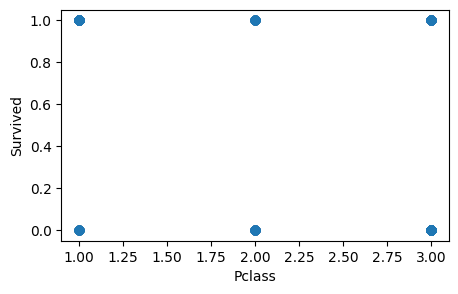

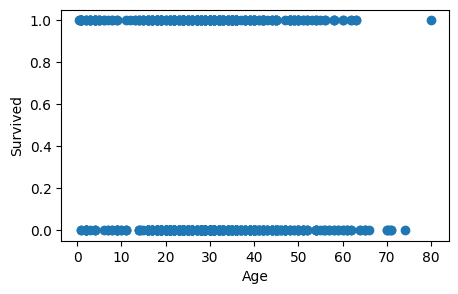

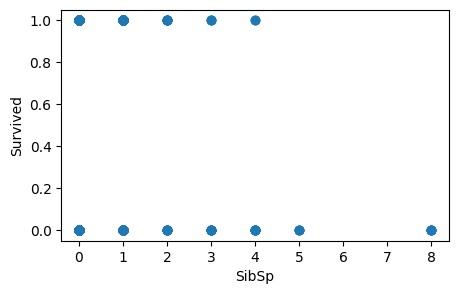

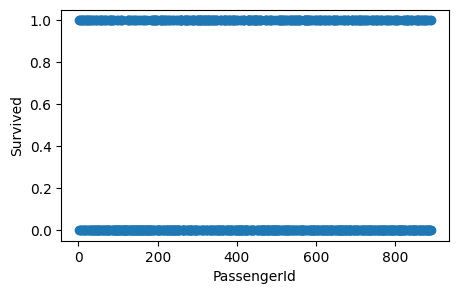

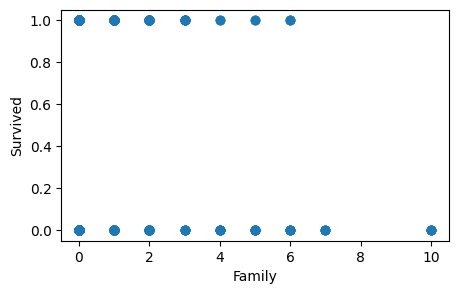

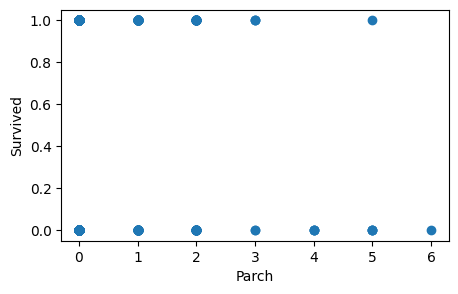

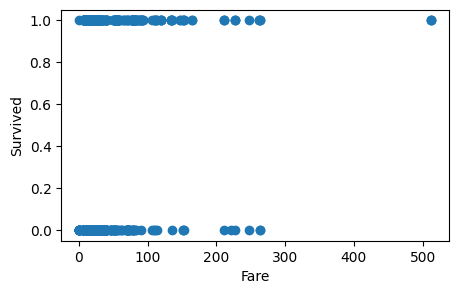

In [10]:
plotgraph(dataCopy['Pclass']) 
plotgraph(dataCopy["Age"]) 
plotgraph(dataCopy['SibSp'])
plotgraph(dataCopy['PassengerId'])
plotgraph(dataCopy['Family'])
plotgraph(dataCopy['Parch'])
plotgraph(dataCopy['Fare'])

In [11]:
# Tabela com dados numéricos
def plotNumTable(data):
    treshold = data.mean()
    TH = 0; TL = 0; FH = 0; FL = 0
    for i in range(len(dataCopy['Survived'])):
        if dataCopy['Survived'][i] == 1 and data[i] > treshold:
            TH += 1
        elif dataCopy['Survived'][i] == 1 and data[i] <= treshold:
            TL += 1
        elif dataCopy['Survived'][i] == 0 and data[i] > treshold:
            FH += 1
        elif dataCopy['Survived'][i] == 0 and data[i] <= treshold:
            FL += 1
    plt.title(f"{data.name}")
    plt.table(cellText=([TH, FH], [TL, FL]), rowLabels=["Higer", "Lower"], 
              colLabels=(["Survived", "Not Survived"]), loc='center')
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    plt.show()

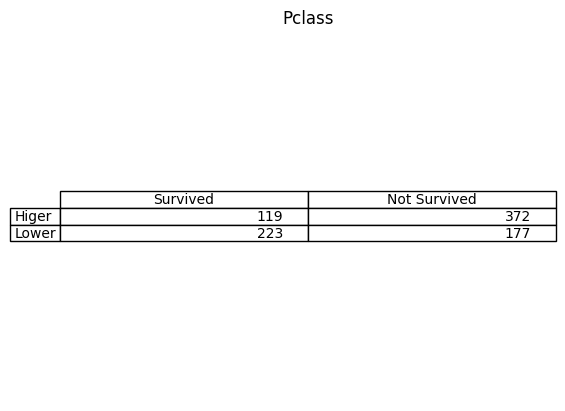

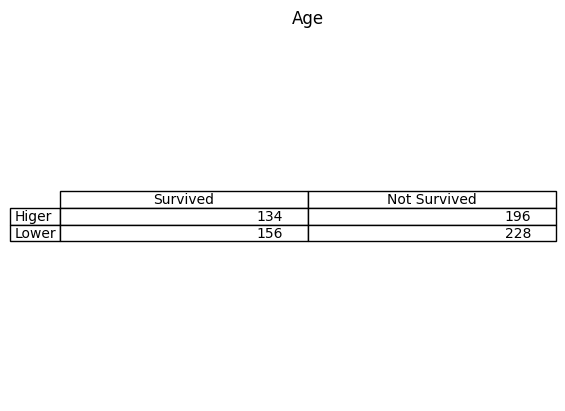

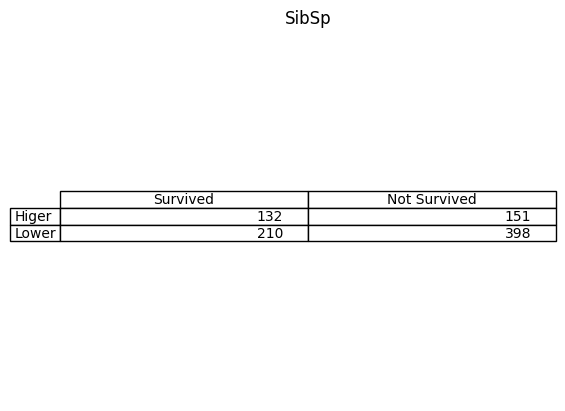

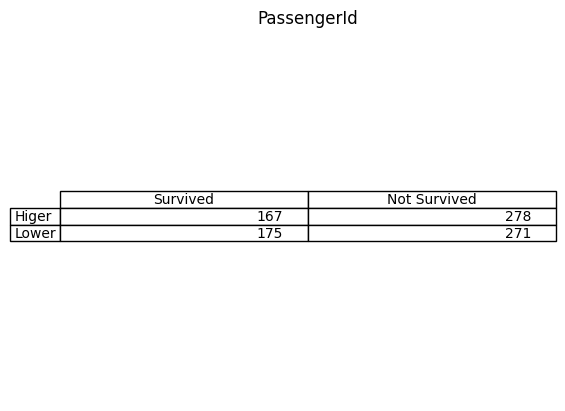

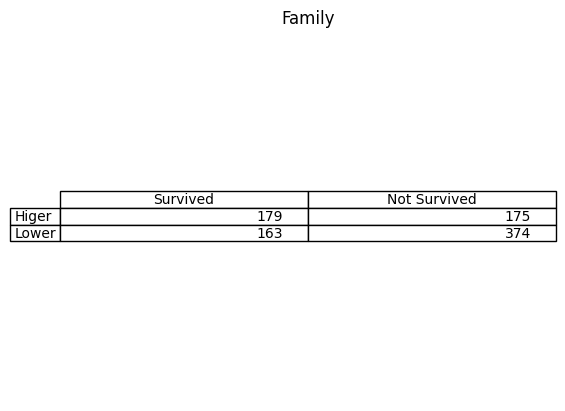

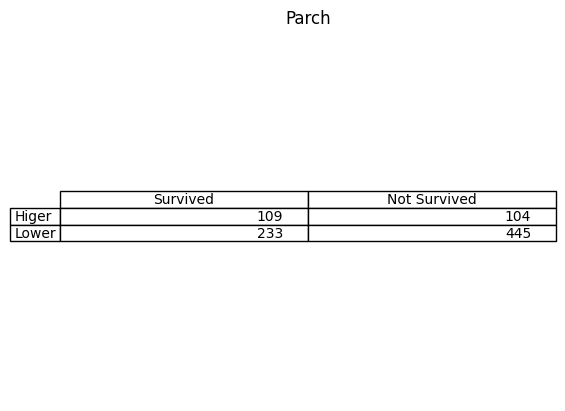

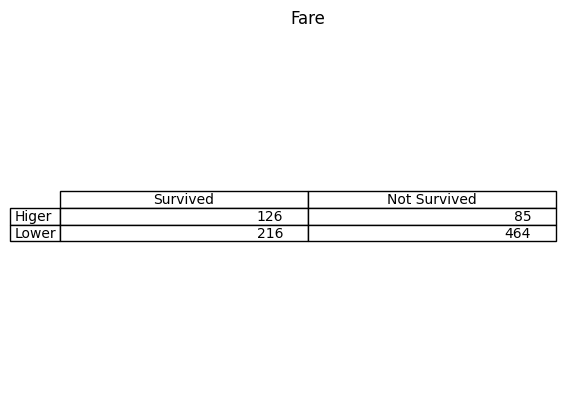

In [12]:
plotNumTable(dataCopy['Pclass']) 
plotNumTable(dataCopy["Age"]) 
plotNumTable(dataCopy['SibSp'])
plotNumTable(dataCopy['PassengerId'])
plotNumTable(dataCopy['Family'])
plotNumTable(dataCopy['Parch'])
plotNumTable(dataCopy['Fare'])

# Numerical features to consider:
## "Pclass", "Family", "Fare"

# Looking for correlations (Categorical Features)
## "Pclass", "Sex", "Age" and "Embarked"

### "Pclass" feature

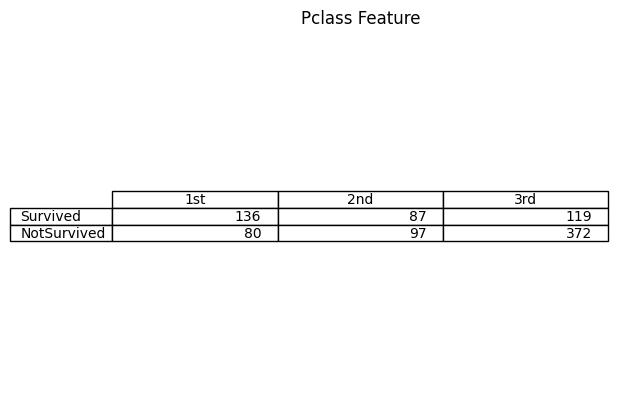

In [13]:
Fst = 0; Snd = 0; Thr = 0
NFst = 0; NSnd = 0; NThr = 0
for i in range(len(dataCopy['Survived'])):
    if dataCopy['Survived'][i] == 1:
        if dataCopy['Pclass'][i] == 1:
            Fst += 1
        elif dataCopy['Pclass'][i] == 2:
            Snd += 1
        elif dataCopy['Pclass'][i] == 3:
            Thr += 1
    else:
        if dataCopy['Pclass'][i] == 1:
            NFst += 1
        elif dataCopy['Pclass'][i] == 2:
            NSnd += 1
        elif dataCopy['Pclass'][i] == 3:
            NThr += 1
    
plt.title('Pclass Feature')
plt.table(cellText=([[Fst, Snd, Thr], [NFst, NSnd, NThr]]), rowLabels=["Survived", "NotSurvived"], 
          colLabels=(['1st', '2nd', '3rd']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

### "Sex" feature

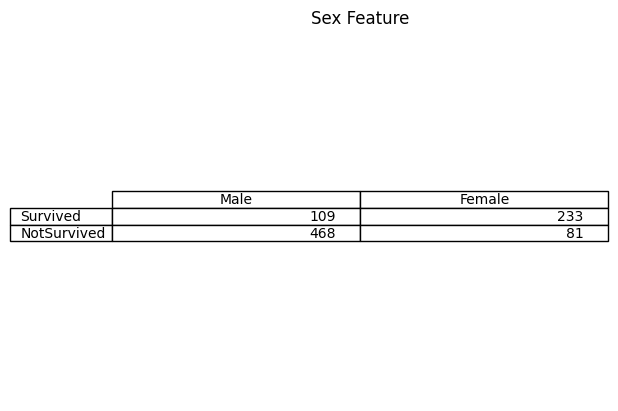

In [14]:
M = 0; F = 0; NM = 0; NF = 0
for i in range(len(dataCopy['Survived'])):
    if dataCopy['Survived'][i] == 1:
        if dataCopy['Sex'][i] == 'male':
            M += 1
        elif dataCopy['Sex'][i] == 'female':
            F += 1
    else:
        if dataCopy['Sex'][i] == 'male':
            NM += 1
        elif dataCopy['Sex'][i] == 'female':
            NF += 1

plt.title('Sex Feature')
plt.table(cellText=([[M, F], [NM, NF]]), rowLabels=["Survived", "NotSurvived"], 
          colLabels=(['Male', 'Female']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

### "Age" Feature

In [15]:
print(dataCopy['Age'].max(), dataCopy['Age'].min())

80.0 0.42


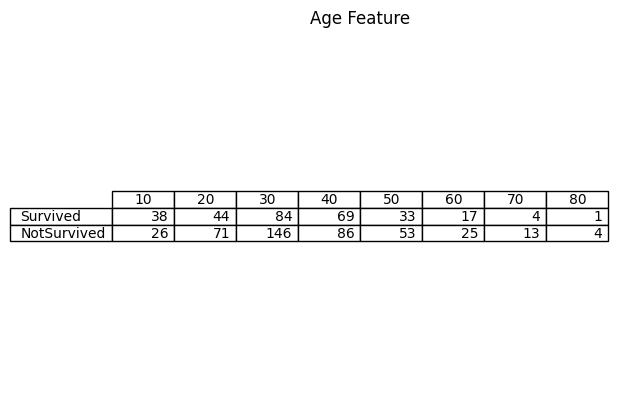

In [16]:
age10 = 0;  age20 = 0; age30 = 0; age40 = 0; age50 = 0; age60 = 0; age70 = 0; age80 = 0
Nage10 = 0;  Nage20 = 0; Nage30 = 0; Nage40 = 0; Nage50 = 0; Nage60 = 0; Nage70 = 0; Nage80 = 0
for i in range(len(dataCopy['Survived'])):
    if dataCopy['Survived'][i] == 1:
        if dataCopy["Age"][i] <= 10:
            age10 += 1
        elif dataCopy["Age"][i] <= 20:
            age20 += 1
        elif dataCopy["Age"][i] <= 30:
            age30 += 1
        elif dataCopy["Age"][i] <= 40:
            age40 += 1
        elif dataCopy["Age"][i] <= 50:
            age50 += 1
        elif dataCopy["Age"][i] <= 60:
            age60 += 1
        elif dataCopy["Age"][i] <= 70:
            age70 += 1
        elif dataCopy["Age"][i] <= 80:
            age80 += 1
    else:
        if dataCopy["Age"][i] <= 10:
            Nage10 += 1
        elif dataCopy["Age"][i] <= 20:
            Nage20 += 1
        elif dataCopy["Age"][i] <= 30:
            Nage30 += 1
        elif dataCopy["Age"][i] <= 40:
            Nage40 += 1
        elif dataCopy["Age"][i] <= 50:
            Nage50 += 1
        elif dataCopy["Age"][i] <= 60:
            Nage60 += 1
        elif dataCopy["Age"][i] <= 70:
            Nage70 += 1
        elif dataCopy["Age"][i] <= 80:
            Nage80 += 1
        
plt.title('Age Feature')
plt.table(cellText=([[age10, age20, age30, age40, age50, age60, age70, age80], 
                     [Nage10, Nage20, Nage30, Nage40, Nage50, Nage60, Nage70, Nage80]]), rowLabels=["Survived", "NotSurvived"], 
          colLabels=(['10', '20', '30', '40', '50', '60', '70', '80']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

### "Embarked" Feature

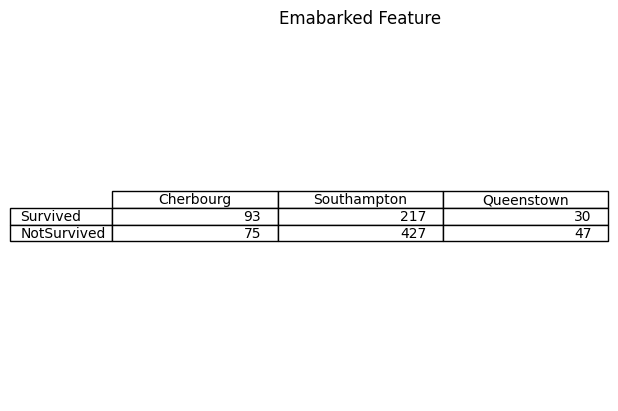

In [17]:
C = 0; S = 0; Q = 0
NC = 0; NS = 0; NQ = 0
for i in range(len(dataCopy['Survived'])):
    if dataCopy['Survived'][i] == 1:
        if dataCopy['Embarked'][i] == 'C':
            C += 1
        elif dataCopy['Embarked'][i] == 'S':
            S += 1
        elif dataCopy['Embarked'][i] == 'Q':
            Q += 1
    else:
        if dataCopy['Embarked'][i] == 'C':
            NC += 1
        elif dataCopy['Embarked'][i] == 'S':
            NS += 1
        elif dataCopy['Embarked'][i] == 'Q':
            NQ += 1
    
plt.title('Emabarked Feature')
plt.table(cellText=([[C, S, Q], [NC, NS, NQ]]), rowLabels=["Survived", "NotSurvived"], 
          colLabels=(['Cherbourg', 'Southampton', 'Queenstown']), loc='center')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.show()

# Categorical Features to consider
## "Pclass", "Sex" and "Embarked"

In [18]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


# Chosen features:
## "Pclass", "Sex", "Fare", "Embarked", "Family"

# Classifying textual features "Sex" and "Embarked"

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

dataCopy['Sex'] = ordinal_encoder.fit_transform(dataCopy[['Sex']])
dataCopy['Embarked'] = ordinal_encoder.fit_transform(dataCopy[['Embarked']])
dataCopy['Embarked'] = dataCopy['Embarked'].fillna(-1)

In [20]:
dataCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,2.0,0


# Scaling "Fare" feature

<AxesSubplot: >

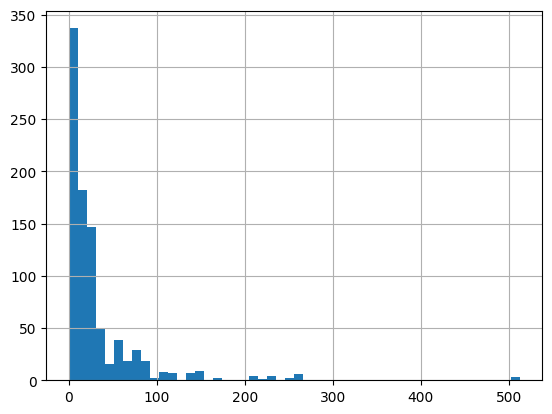

In [21]:
dataCopy['Fare'].hist(bins=50)

In [22]:
dataCopy['Fare'] = dataCopy['Fare']/dataCopy['Fare'].mean()

<AxesSubplot: >

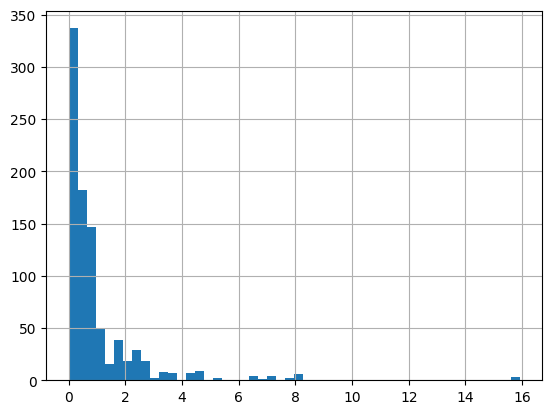

In [23]:
dataCopy['Fare'].hist(bins=50)

In [24]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
 12  Family       891 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 90.6+ KB


# Training Models

In [25]:
features = dataCopy[['Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Embarked']]
labels = dataCopy['Survived']

# Preparing the test set

In [26]:
testDF = pd.read_csv("/home/emanueloliveira/Kaggle Challenges/titanic/test.csv")
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
# Creating "Family" feature

testDF['Family'] = testDF['SibSp'] + testDF['Parch']

In [28]:
# Classifying textual features "sex" and "Embarked"

testDF['Sex'] = ordinal_encoder.fit_transform(testDF[['Sex']])
testDF['Embarked'] = ordinal_encoder.fit_transform(testDF[['Embarked']])
testDF['Embarked'] = testDF['Embarked'].fillna(-1)

In [29]:
# Scaling "Fare" feature
testDF['Fare'] = testDF['Fare'].fillna(testDF['Fare'].mean())
testDF['Fare'] = testDF['Fare'] / testDF['Fare'].mean()


In [30]:
testFeatures = testDF[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Selecting the model (Cross Validation)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

featuresTrain, featuresTunn, labelsTrain, labelsTunn = train_test_split(features, labels, test_size=0.2, random_state=42)
print(len(featuresTrain), len(labelsTrain))

712 712


In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", round(scores.mean(), 5))
    print("Standard deviation:", round(scores.std(), 5))

In [33]:
from sklearn.metrics import accuracy_score

### Decision Tree

In [34]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
tree_clf.fit(featuresTrain, labelsTrain)
tree_predictions = tree_clf.predict(featuresTunn)
accuracy_score(labelsTunn, tree_predictions)

0.7932960893854749

In [35]:
display_scores(tree_scores)

Scores: [0.83333333 0.79166667 0.69014085 0.84507042 0.87323944 0.74647887
 0.78873239 0.73239437 0.77464789 0.84507042]
Mean: 0.79208
Standard deviation: 0.055


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
forest_clf.fit(featuresTrain, labelsTrain)
forest_predictions = forest_clf.predict(featuresTunn)
accuracy_score(labelsTunn, forest_predictions)

0.8044692737430168

In [37]:
display_scores(forest_scores)

Scores: [0.77777778 0.76388889 0.70422535 0.83098592 0.84507042 0.74647887
 0.77464789 0.78873239 0.74647887 0.88732394]
Mean: 0.78656
Standard deviation: 0.05126


### SVC 'linear'

In [38]:
from sklearn.svm import SVC

svcl_clf = SVC(kernel='linear')
svcl_scores = cross_val_score(svcl_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcl_clf.fit(featuresTrain, labelsTrain)
svcl_predictions = svcl_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcl_predictions)

0.7821229050279329

In [39]:
display_scores(svcl_scores)

Scores: [0.83333333 0.75       0.69014085 0.95774648 0.81690141 0.67605634
 0.73239437 0.77464789 0.76056338 0.88732394]
Mean: 0.78791
Standard deviation: 0.08315


### SVC 'poly'

In [40]:
svcp_clf = SVC(kernel='poly')
svcp_scores = cross_val_score(svcp_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcp_clf.fit(featuresTrain, labelsTrain)
svcp_predictions = svcp_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcp_predictions)

0.7821229050279329

In [41]:
display_scores(svcp_scores)

Scores: [0.84722222 0.75       0.70422535 0.92957746 0.85915493 0.69014085
 0.76056338 0.77464789 0.73239437 0.88732394]
Mean: 0.79353
Standard deviation: 0.07761


### SVC 'rbf'

In [42]:
svcr_clf = SVC(kernel='rbf')
svcr_scores = cross_val_score(svcr_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcr_clf.fit(featuresTrain, labelsTrain)
svcr_predictions = svcr_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcr_predictions)

0.7988826815642458

In [43]:
display_scores(svcr_scores)

Scores: [0.84722222 0.75       0.73239437 0.95774648 0.84507042 0.74647887
 0.76056338 0.73239437 0.74647887 0.90140845]
Mean: 0.80198
Standard deviation: 0.07636


### SVC 'sigmoid'

In [44]:
svcs_clf = SVC(kernel='sigmoid')
svcs_scores = cross_val_score(svcs_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
svcs_clf.fit(featuresTrain, labelsTrain)
svcs_predictions = svcs_clf.predict(featuresTunn)
accuracy_score(labelsTunn, svcs_predictions)

0.6256983240223464

In [45]:
display_scores(svcs_scores)

Scores: [0.61111111 0.65277778 0.61971831 0.69014085 0.57746479 0.50704225
 0.64788732 0.5915493  0.6056338  0.66197183]
Mean: 0.61653
Standard deviation: 0.04907


### LinearSVC

In [46]:
from sklearn.svm import LinearSVC

lsvc_clf = LinearSVC()
lsvc_scores = cross_val_score(lsvc_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
lsvc_clf.fit(featuresTrain, labelsTrain)
lsvc_predictions = lsvc_clf.predict(featuresTunn)
accuracy_score(labelsTunn, lsvc_predictions)

/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home

0.7877094972067039

In [47]:
display_scores(lsvc_scores)

Scores: [0.83333333 0.75       0.69014085 0.94366197 0.84507042 0.70422535
 0.74647887 0.76056338 0.76056338 0.90140845]
Mean: 0.79354
Standard deviation: 0.0796


### Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
gb_clf.fit(featuresTrain, labelsTrain)
gb_predictions = gb_clf.predict(featuresTunn)
accuracy_score(labelsTunn, gb_predictions)

0.7932960893854749

In [49]:
display_scores(gb_scores)

Scores: [0.84722222 0.73611111 0.74647887 0.91549296 0.87323944 0.76056338
 0.77464789 0.73239437 0.73239437 0.84507042]
Mean: 0.79636
Standard deviation: 0.06412


### MLPClassifier

In [50]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
mlp_scores = cross_val_score(mlp_clf, featuresTrain, labelsTrain, scoring="accuracy", cv=10)
mlp_clf.fit(featuresTrain, labelsTrain)
mlp_predictions = mlp_clf.predict(featuresTunn)
accuracy_score(labelsTunn, mlp_predictions)

/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559

0.7877094972067039

In [51]:
display_scores(mlp_scores)

Scores: [0.875      0.79166667 0.73239437 0.90140845 0.83098592 0.73239437
 0.77464789 0.71830986 0.8028169  0.85915493]
Mean: 0.80188
Standard deviation: 0.06072


## Best Models (Considering their mean-score values):
### SVC 'rbf'
### MLPClassifier
### Gradient Boosting

# SVC 'rbf'

## Tuning Hyperparameters

In [52]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(featuresTrain, labelsTrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.636 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [54]:
svc_clf = SVC(C=1, gamma=0.1)
svc_clf = svc_clf.fit(features, labels)

# MLPClassifier

## Tuning Hyperparameters

In [59]:
# defining parameter range
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
} 
  
grid = GridSearchCV(MLPClassifier(max_iter=500), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(featuresTrain, labelsTrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.797 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.818 total time=   0.6s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.782 total time=   0.5s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.746 total time=   0.3s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.796 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.797 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.846 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.775 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.754 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.824 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.818 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.811 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.789 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.739 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.796 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.776 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.832 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.789 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.739 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.831 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.825 total time=   0.4s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.797 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.796 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.797 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.825 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.761 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.739 total time=   0.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.817 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.832 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.811 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.789 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.732 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.817 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.804 total time=   0.4s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.825 total time=   0.3s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.775 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.746 total time=   0.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.803 total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.804 total time=   0.5s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.825 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.775 total time=   0.6s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.746 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.803 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.818 total time=   0.7s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.825 total time=   0.6s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.746 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.739 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.803 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.804 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.811 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.775 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.732 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.831 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.769 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.811 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.775 total time=   0.7s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.754 total time=   0.6s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.817 total time=   0.7s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.818 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.811 total time=   0.3s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.789 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.796 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.804 total time=   0.4s
[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.825 total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.775 total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.754 total time=   0.3s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.796 total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.825 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.811 total time=   0.3s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.775 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.725 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.803 total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.797 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.825 total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.768 total time=   0.4s
[CV 4/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.768 total time=   0.3s
[CV 5/5] END activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.817 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.818 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.818 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.761 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.810 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.797 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.804 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.761 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.761 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.775 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.825 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.811 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.782 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.732 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.817 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.769 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.825 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.782 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.746 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.824 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.783 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.797 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.803 total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.803 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.811 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.811 total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.789 total time=   0.2s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.739 total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.803 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.762 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.804 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.782 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.718 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.725 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.818 total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.818 total time=   0.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.768 total time=   0.3s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.761 total time=   0.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.789 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.811 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.804 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.810 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.789 total time=   0.6s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.790 total time=   0.5s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.839 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.796 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.761 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam;, score=0.810 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.804 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.783 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.768 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.725 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd;, score=0.817 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.790 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.811 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.768 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.746 total time=   0.6s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam;, score=0.838 total time=   0.6s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.818 total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.811 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.782 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.739 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd;, score=0.789 total time=   0.3s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.811 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.818 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.768 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.754 total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.817 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.797 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.818 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.789 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.732 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd;, score=0.789 total time=   0.3s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.811 total time=   0.4s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.832 total time=   0.3s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.789 total time=   0.4s


/home/emanueloliveira/notebook/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.775 total time=   0.4s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam;, score=0.810 total time=   0.3s


GridSearchCV(estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=3)

In [60]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
MLPClassifier(alpha=0.05, hidden_layer_sizes=(20,), learning_rate='adaptive',
              max_iter=500)


In [61]:
mlp_clf = MLPClassifier(alpha=0.05, hidden_layer_sizes=(20,), learning_rate='adaptive', max_iter=500)
mlp_clf = mlp_clf.fit(features, labels)

# Gradient Boosting

## Tuning Hyperparameters

In [62]:
# defining parameter range
param_grid = {'min_samples_split': np.arange(2, 50, 4), 
              'n_estimators': np.arange(2, 150, 2)} 
  
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(featuresTrain, labelsTrain)

Fitting 5 folds for each of 888 candidates, totalling 4440 fits
[CV 1/5] END min_samples_split=2, n_estimators=2;, score=0.622 total time=   0.0s
[CV 2/5] END min_samples_split=2, n_estimators=2;, score=0.622 total time=   0.0s
[CV 3/5] END min_samples_split=2, n_estimators=2;, score=0.627 total time=   0.0s
[CV 4/5] END min_samples_split=2, n_estimators=2;, score=0.627 total time=   0.0s
[CV 5/5] END min_samples_split=2, n_estimators=2;, score=0.620 total time=   0.0s
[CV 1/5] END min_samples_split=2, n_estimators=4;, score=0.776 total time=   0.0s
[CV 2/5] END min_samples_split=2, n_estimators=4;, score=0.825 total time=   0.0s
[CV 3/5] END min_samples_split=2, n_estimators=4;, score=0.796 total time=   0.0s
[CV 4/5] END min_samples_split=2, n_estimators=4;, score=0.768 total time=   0.0s
[CV 5/5] END min_samples_split=2, n_estimators=4;, score=0.796 total time=   0.0s
[CV 1/5] END min_samples_split=2, n_estimators=6;, score=0.776 total time=   0.0s
[CV 2/5] END min_samples_split=2, 

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_split': array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46]),
                         'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148])},
             verbose=3)

In [63]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'min_samples_split': 34, 'n_estimators': 92}
GradientBoostingClassifier(min_samples_split=34, n_estimators=92)


In [64]:
gb_clf = GradientBoostingClassifier(min_samples_split=34, n_estimators=92)
gb_clf = gb_clf.fit(features, labels)

# Creating CSV file to submit 

## SVC

In [65]:
SVCPredict = []
for i in svc_clf.predict(testFeatures):
    SVCPredict.append(i)

answerSVC = pd.DataFrame()
answerSVC['PassengerId'] = testDF['PassengerId']
answerSVC['Survived'] = SVCPredict

answerSVC.to_csv(path_or_buf='/home/emanueloliveira/Kaggle Challenges/titanic/answerSVC.csv', index=False)

## MLPClassifier

In [68]:
MLPPredict = []
for i in mlp_clf.predict(testFeatures):
    MLPPredict.append(i)

answerMLP = pd.DataFrame()
answerMLP['PassengerId'] = testDF['PassengerId']
answerMLP['Survived'] = MLPPredict

answerSVC.to_csv(path_or_buf='/home/emanueloliveira/Kaggle Challenges/titanic/answerMLP.csv', index=False)

## Gradient Boosting

In [69]:
GBPredict = []
for i in gb_clf.predict(testFeatures):
    GBPredict.append(i)

answerGB = pd.DataFrame()
answerGB['PassengerId'] = testDF['PassengerId']
answerGB['Survived'] = GBPredict

answerGB.to_csv(path_or_buf='/home/emanueloliveira/Kaggle Challenges/titanic/answerGB.csv', index=False)